In [1]:
import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [2]:
matches = pd.read_csv('matches.csv')

In [3]:
matches.shape

(636, 14)

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             629 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           636 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  636 non-null    object
dtypes: int64(5), object(9)
memory usage: 69.7+ KB


In [6]:
# How many seasons we've got in the dataset?
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [7]:
# Which Team had won by maximum runs?
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                       5/6/2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
Name: 43, dtype: object

In [8]:
# Which Team had won by maximum wickets?¶
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                     3
season                              2017
city                              Rajkot
date                            4/7/2017
team1                      Gujarat Lions
team2              Kolkata Knight Riders
toss_winner        Kolkata Knight Riders
toss_decision                      field
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                        10
player_of_match                  CA Lynn
Name: 2, dtype: object

In [9]:
# Which Team had won by (closest margin) minimum runs?
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                     59
season                               2017
city                            Hyderabad
date                            5/21/2017
team1                      Mumbai Indians
team2              Rising Pune Supergiant
toss_winner                Mumbai Indians
toss_decision                         bat
result                             normal
dl_applied                              0
winner                     Mumbai Indians
win_by_runs                             1
win_by_wickets                          0
player_of_match                 KH Pandya
Name: 58, dtype: object

In [10]:
matches[matches[matches['win_by_runs'].ge(1)].win_by_runs.min() == matches['win_by_runs']]['winner']  #to handle the issue of only one team being shown 

58                  Mumbai Indians
105                Kings XI Punjab
163                Kings XI Punjab
344               Delhi Daredevils
350                 Mumbai Indians
518            Chennai Super Kings
598                  Gujarat Lions
614    Royal Challengers Bangalore
Name: winner, dtype: object

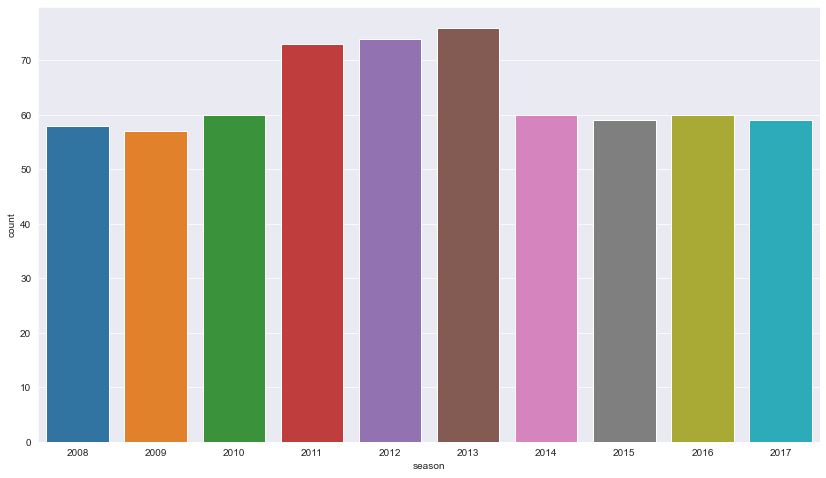

In [11]:
# Which season had most number of matches?
sns.countplot(x='season', data=matches)
plt.show()

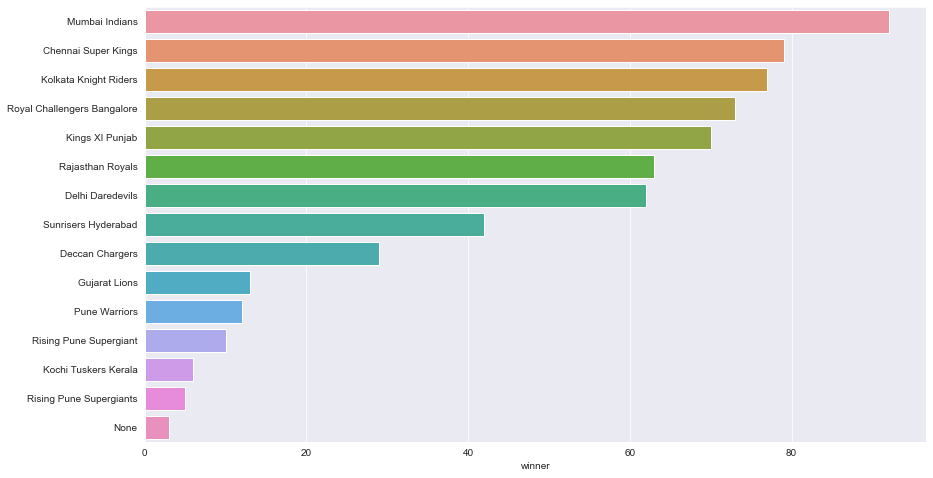

In [13]:
# The most successful IPL Team
#sns.countplot(y='winner', data = matches)
#plt.show

data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

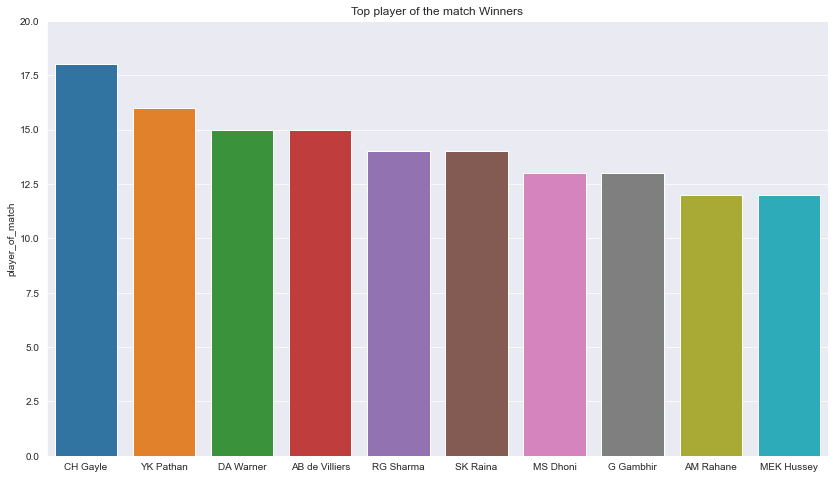

In [14]:
# Top player of the match Winners
top_players = matches.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

In [15]:
# Has Toss-winning helped in Match-winning?
# How many Toss winning teams have won the matches?

ss = matches['toss_winner'] == matches['winner']

ss.groupby(ss).size()

False    311
True     325
dtype: int64